## Regression Problem

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [8]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=50, n_features=5)

In [9]:
X = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
y = pd.Series(y, name='Target')

In [10]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

fs = SelectKBest(score_func=mutual_info_regression, k=3)
fs.fit(X, y)

,score_func,<function mut...0025D515D9510>
,k,3


In [11]:
fs.scores_

array([0.        , 0.        , 0.39584044, 0.06674293, 0.14623319])

In [12]:
ml_score = pd.Series(fs.scores_, index=X.columns)

<Axes: >

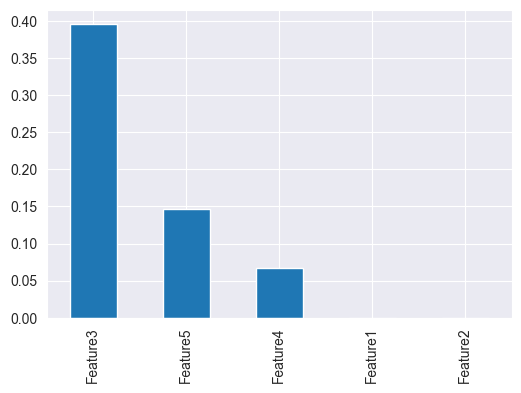

In [14]:
ml_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))

In [15]:
X_selected = fs.fit_transform(X, y)
X_selected = pd.DataFrame(X_selected, columns=['Feature1', 'Feature2', 'Feature3'])
X_selected.head()

,Feature1,Feature2,Feature3
0,-1.238454,0.170119,-0.397899
1,-0.361964,1.066116,0.195793
2,-2.025481,-0.115753,1.793141
3,2.090080,0.716843,-0.858428
4,-0.412216,0.324220,1.833768


## Classification Problem

In [16]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [17]:
X, y = make_classification(n_samples=50, n_features=5, n_classes=2, n_informative=2)
X = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
y = pd.Series(y, name='Target')

<Axes: >

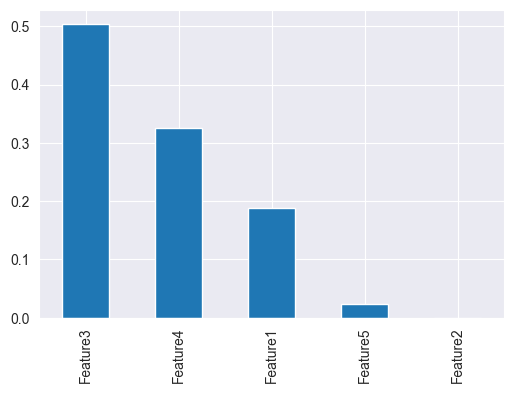

In [18]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)
fs.fit(X, y)
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score.sort_values(ascending=False).plot.bar(figsize=(6, 4))

In [19]:
selected_X = fs.fit_transform(X, y)
selected_X = pd.DataFrame(selected_X, columns=['Feature1', 'Feature2', 'Feature3'])
selected_X.head()

,Feature1,Feature2,Feature3
0,-0.041086,-1.587648,-0.907825
1,-0.069194,-1.178297,-0.889853
2,-0.002845,1.029054,0.423839
3,0.052968,1.487397,0.931334
4,-0.073177,-0.889799,-0.788813
